# Visualización via TSNE

Importamos todas las librerías y leemos el conjunto de datos.

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import csv
import pandas as pd

import plotly.express as px
import plotly

from scipy import sparse

import matplotlib.pyplot as plt

from random import randint
colors = []

for i in range(6):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

data = None

with open("../data/train_values.csv") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=",", quotechar="|")
    i=1
    names = []
    d = []
    for row in spamreader:
        if i==1:
            d = {"id": []}
            names.append("id")
            for r in row[1:]:
                d[r] = []
                names.append(r)
        else:
            for r,n in zip(row, names):
                d[n].append(r)
        i+=1

data = pd.DataFrame(d)

Asignamos los tipos a las variables manualmente.

In [9]:
data = data.astype({
    "id" : "int",
    "amount_tsh" : "float",
    "date_recorded" : "datetime64",
    "funder" : "str",
    "gps_height" : "float",
    "installer" : "str",
    "longitude" : "float",
    "latitude" : "float",
    "wpt_name" : "str",
    "num_private" : "int",
    "basin" : "str",
    "subvillage" : "str",
    "region" : "str",
    "region_code" : "int",
    "district_code" : "int",
    "lga" : "str",
    "ward" : "str",
    "population" : "int",
    "public_meeting" : "bool",
    "recorded_by" : "str",
    "scheme_management" : "str",
    "scheme_name" : "str",
    "permit" : "bool",
    "construction_year" : "int",
    "extraction_type" : "str",
    "extraction_type_group" : "str",
    "extraction_type_class" : "str",
    "management" : "str",
    "management_group" : "str",
    "payment" : "str",
    "payment_type" : "str",
    "water_quality" : "str",
    "quality_group" : "str",
    "quantity" : "str",
    "quantity_group" : "str",
    "source" : "str",
    "source_type" : "str",
    "source_class" : "str",
    "waterpoint_type" : "str",
    "waterpoint_type_group" : "str"
})

Pasamos las columnas que son strings a categóricas.

In [10]:
# En primer lugar pasamos los strings a variables categoricas y luego a enteros
categorical_columns = ["funder",
                        "installer",
                        "wpt_name",
                        "basin",
                        "subvillage",
                        "region",
                        "lga",
                        "ward",
                        "recorded_by",
                        "scheme_management",
                        "scheme_name",
                        "extraction_type",
                        "extraction_type_group",
                        "extraction_type_class",
                        "management",
                        "management_group",
                        "payment",
                        "payment_type",
                        "water_quality",
                        "quality_group",
                        "quantity",
                        "quantity_group",
                        "source",
                        "source_type",
                        "source_class",
                        "waterpoint_type"]

for cat in categorical_columns:
    data[cat] = pd.Categorical(data[cat])

Vamos a ver el conjunto de datos con el que hemos acabado.

In [11]:
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,,0.0,,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0.0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


Preparamos el conjunto para poder hacer One Hot Encoding. Lo que hacemos es tomar cada columna categórica y si tenemos más de 100 categorías entonces aplicamos una reducción. Si hay categorías con muy pocos elementos que tengan su valor eliminamos la categoría y aglomeramos las mismas en una sola.

In [12]:
for cat in categorical_columns:
    print("Filtering the column " + cat + " before One Hot Encoding, num. categories: " + str(len(data[cat].cat.categories)))
    if len(data[cat].value_counts())<100:
        continue

    threshold = data[cat].value_counts().iloc[0]*0.1
    new_cat = "aglomerate"

    bad_categories = np.array(data[cat].value_counts().index[np.where(data[cat].value_counts()<=threshold)[0]].astype("str"))
    data[cat] = data[cat].cat.add_categories(new_cat)

    for bc in bad_categories:
        data[cat][data[cat]==bc] = new_cat
    data[cat] = data[cat].cat.remove_unused_categories()

Filtering the column funder before One Hot Encoding, num. categories: 1898
Filtering the column installer before One Hot Encoding, num. categories: 2146
Filtering the column wpt_name before One Hot Encoding, num. categories: 37400
Filtering the column basin before One Hot Encoding, num. categories: 9
Filtering the column subvillage before One Hot Encoding, num. categories: 19288
Filtering the column region before One Hot Encoding, num. categories: 21
Filtering the column lga before One Hot Encoding, num. categories: 125
Filtering the column ward before One Hot Encoding, num. categories: 2092
Filtering the column recorded_by before One Hot Encoding, num. categories: 1
Filtering the column scheme_management before One Hot Encoding, num. categories: 13
Filtering the column scheme_name before One Hot Encoding, num. categories: 2697
Filtering the column extraction_type before One Hot Encoding, num. categories: 18
Filtering the column extraction_type_group before One Hot Encoding, num. categ

Vamos a ver cómo han quedado las variables categóricas.

In [13]:
data[categorical_columns]

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,recorded_by,scheme_management,...,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type
0,aglomerate,aglomerate,none,Lake Nyasa,aglomerate,Iringa,Ludewa,Mundindi,GeoData Consultants Ltd,VWC,...,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
1,aglomerate,aglomerate,Zahanati,Lake Victoria,aglomerate,Mara,Serengeti,Natta,GeoData Consultants Ltd,Other,...,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe
2,aglomerate,aglomerate,aglomerate,Pangani,Majengo,Manyara,Simanjiro,aglomerate,GeoData Consultants Ltd,VWC,...,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple
3,Unicef,aglomerate,aglomerate,Ruvuma / Southern Coast,aglomerate,Mtwara,aglomerate,Nanyumbu,GeoData Consultants Ltd,VWC,...,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple
4,aglomerate,aglomerate,Shuleni,Lake Victoria,aglomerate,Kagera,Karagwe,aglomerate,GeoData Consultants Ltd,,...,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,aglomerate,aglomerate,aglomerate,Pangani,aglomerate,Kilimanjaro,Hai,Masama Magharibi,GeoData Consultants Ltd,Water Board,...,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
59396,aglomerate,aglomerate,aglomerate,Rufiji,aglomerate,Iringa,Njombe,Ikondo,GeoData Consultants Ltd,VWC,...,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe
59397,,,aglomerate,Rufiji,aglomerate,Mbeya,Mbarali,Chimala,GeoData Consultants Ltd,VWC,...,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump
59398,aglomerate,aglomerate,aglomerate,Rufiji,aglomerate,Dodoma,Chamwino,aglomerate,GeoData Consultants Ltd,VWC,...,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump


Hacemos One Hot Encoding (puede favorecer a KNN).

In [14]:
dummy = pd.get_dummies(data,prefix=categorical_columns, columns=categorical_columns)

labels = np.array(dummy["waterpoint_type_group"])

dummy = dummy.drop(columns = ["waterpoint_type_group", "date_recorded"])

Hacemos una representación 2D.

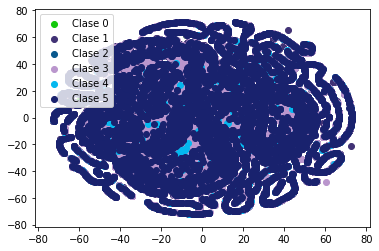

In [15]:
reduced = TSNE(n_components=2).fit_transform(np.array(dummy))

cl0 = np.array([reduced[i] for i in range(len(reduced)) if labels[i]=="cattle trough"])
cl1 = np.array([reduced[i] for i in range(len(reduced)) if labels[i]=="communal standpipe"])
cl2 = np.array([reduced[i] for i in range(len(reduced)) if labels[i]=="dam"])
cl3 = np.array([reduced[i] for i in range(len(reduced)) if labels[i]=="hand pump"])
cl4 = np.array([reduced[i] for i in range(len(reduced)) if labels[i]=="improved spring"])
cl5 = np.array([reduced[i] for i in range(len(reduced)) if labels[i]=="other"])

plt.scatter(cl0[:,0], cl0[:,1], color = colors[0], label = "Clase 0")
plt.scatter(cl1[:,0], cl1[:,1], color = colors[1], label = "Clase 1")
plt.scatter(cl2[:,0], cl2[:,1], color = colors[2], label = "Clase 2")
plt.scatter(cl3[:,0], cl3[:,1], color = colors[3], label = "Clase 3")
plt.scatter(cl4[:,0], cl4[:,1], color = colors[4], label = "Clase 4")
plt.scatter(cl5[:,0], cl5[:,1], color = colors[5], label = "Clase 5")
plt.legend()
plt.show()

Hacemos una representación 3D.

In [16]:
reduced = TSNE(n_components=3).fit_transform(np.array(dummy))

d = pd.DataFrame({"x": reduced[:,0], "y": reduced[:,1], "z": reduced[:,2], "labels": labels})
fig = px.scatter_3d(d, x="x", y="y", z="z", color="labels")
fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
plotly.offline.plot(fig, filename="plot_ohe_3d.html", auto_open=True)

'plot_ohe_3d.html'